In [2]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
%matplotlib inline 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from sklearn import datasets

In [3]:
def gradientdescent(Amat, y, winit, rate, numiter):
    n, p = Amat.shape
    whistory = []
    losshistory = [] 
    w = winit
    for i in range(numiter): 
        loss = np.square(y-Amat.dot(w)).mean()
        whistory.append(w)
        losshistory.append(loss)
        grad = (-2/n)*Amat.T.dot((y-Amat.dot(w)))
        w = w - rate*grad
    return w, np.asarray(whistory), np.asarray(losshistory)


def sgdescent(Amat, y, winit, tn, td, numepochs):
    n, p = Amat.shape
    whistory = []
    losshistory = []
    w = winit
    for epoch in range(numepochs):
        rss = np.square(y-Amat.dot(w)).mean()
        whistory.append(w)
        losshistory.append(loss)
        for k in range(n):
            idx = np.random.randint(n)
            xi = Amat[idx:idx+1]
            yi = y[idx:idx+1]
            grad = (-2)*xi.T.dot((yi-xi.dot(w)))
            rate = tn/(td+(epoch*n+k))   # This schedule is taken from "Hands on Machine Learning" by A Geron.
            w = w - rate*grad
    return w, np.asarray(whistory), np.asarray(losshistory)

w0 5 3


Text(0,0.5,'loss')

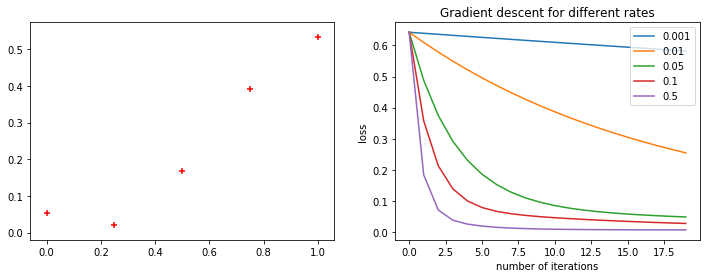

In [4]:
# create small training data set ##########################
def f(x):
    return 0.5*(x)*(x**4)/(.05+(x**4))
ntrain=5
np.random.seed(0)
X=np.linspace(0,1,ntrain)
Xsq=np.square(X)
y0=f(X)+0.03*np.random.normal(0,1,ntrain)

##################################################
# create design matix to fit a quadratic function 
Aquad=np.stack((np.ones(ntrain),X,Xsq)).T  ############

# for predictions on range of inputs ##########################
ntest=50
Xtest=np.linspace(0,1,ntest)


n, p = Aquad.shape
w0 = np.random.randn(p)
print('w0',n,p)
rates = [.001,.01,.05,.1,.5]
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(12,4))
ax[0].scatter(X,y0,marker='+',color='r')
for i, r in enumerate(rates):
    ax[1].plot(gradientdescent(Aquad, y0,  w0, r, 20)[2],label=r)
ax[1].legend() 
ax[1].set_title("Gradient descent for different rates")
ax[1].set_xlabel("number of iterations")
ax[1].set_ylabel("loss")

#### Stochastic Gradient Descent for different inital rates and number of iterations

In [22]:
def gradientdescent(Amat, y, winit, rate, numiter):
    n, p = Amat.shape
    whistory = []
    losshistory = [] 
    w = winit
    for i in range(numiter): 
        loss = np.square(y-Amat.dot(w)).mean()
        whistory.append(w)
        losshistory.append(loss)
        grad = (-2/n)*Amat.T.dot((y-Amat.dot(w)))
        w = w - rate*grad
    return w, np.asarray(whistory), np.asarray(losshistory)


def sgdescent(Amat, y, winit, tn, td, numepochs):
    n, p = Amat.shape
    whistory = []
    losshistory = []
    w = winit
    for epoch in range(numepochs):
        loss = np.square(y-Amat.dot(w)).mean()
        whistory.append(w)
        losshistory.append(loss)
        for k in range(n):
            idx = np.random.randint(n)
            xi = Amat[idx:idx+1]
            yi = y[idx:idx+1]
            grad = (-2)*xi.T.dot((yi-xi.dot(w)))
            rate = tn/(td+(epoch*n+k))   # This schedule is taken from "Hands on Machine Learning" by A Geron.
            w = w - rate*grad
    return w, np.asarray(whistory), np.asarray(losshistory)

Linear algebra fit:  [0.01790558 0.14722141 0.33120717]
Initial weight: [-0.10321885  0.4105985   0.14404357]
tn 0.01 wts [-0.10054467  0.41130888  0.14449594]
tn 0.1 wts [-0.08211197  0.41583494  0.14746678]
tn 1 wts [-0.04824647  0.40648007  0.13810416]
tn 10 wts [-0.01363332  0.36146981  0.12121758]


Text(0.5,1,'SGD fit for training+test set ($0\\leq x\\leq 2$)')

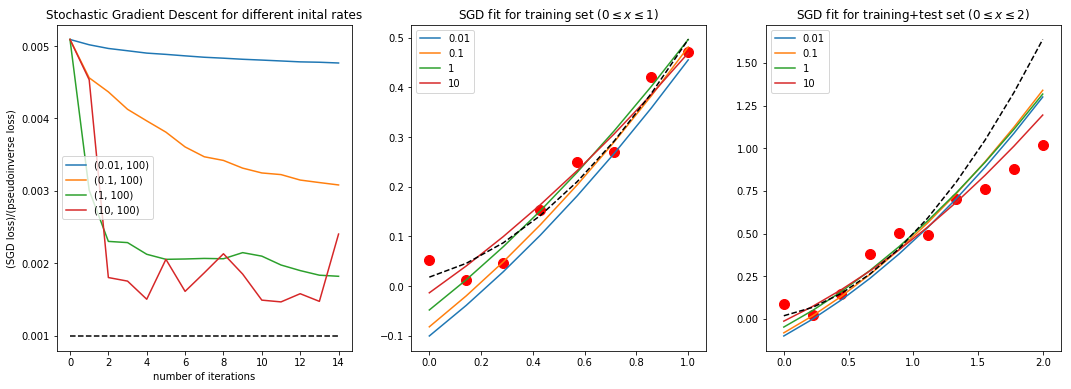

In [23]:
npts=8
np.random.seed(0)
X=np.linspace(0,1,npts)
Xsq=np.square(X)
y0=f(X)+0.03*np.random.normal(0,1,npts)
Alin=np.stack((np.ones(npts),X)).T # design matrix for linear fit; we'll ignore this here, but use it in the next part
Aquad=np.stack((np.ones(npts),X,Xsq)).T # design matrix for quadratic fit

# training by pseudoinverse computation -- this is where gradient descent comes to a halt

wqbest = np.linalg.pinv(Aquad).dot(y0)
resbest = np.atleast_2d(y0-Aquad.dot(wqbest)) # residual vector
lossleast = np.square(resbest).mean()
print("Linear algebra fit: ", wqbest)


#training by SGD

n, p = Aquad.shape
w0 = np.random.randn(p)
print("Initial weight:", w0)
#w0 = np.asarray([-.5,1.5,.5])
nepoch = 15
tnlist = [.01,.1,1,10]
wlist = [] # this is where the final weights at the end of the SGD training will be stored
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(18,6))
td = 15
for i, tn in enumerate(tnlist):
    wts, whist, losshist = sgdescent(Aquad, y0,  w0, tn, td, nepoch)
    wlist.append(wts) # keep the weights at the end of training epoch here
#    print("Weight vector: ", wts)
    ax[0].plot(losshist,label=(tn,100))
    print("tn",tn, "wts", wts)
ax[0].plot(lossleast*np.ones(nepoch),'--',c='k')    
ax[0].legend() 
ax[0].set_title("Stochastic Gradient Descent for different inital rates")
ax[0].set_xlabel("number of iterations")
ax[0].set_ylabel("(SGD loss)/(pseudoinverse loss)")
for i, k in enumerate(wlist):
    ax[1].plot(X,Aquad.dot(wlist[i]),label=tnlist[i]) # Aquad.dot(wlist[i]) is the prediction 
ax[1].plot(X,Aquad.dot(wqbest),'--',c='k')    
ax[1].scatter(X,y0, color='r', s=100)
ax[1].legend()
ax[1].set_title("SGD fit for training set ($0\leq x\leq 1$)")
# test set
npred = 10 # number of data points to be tested on
np.random.seed(0)
Xp=np.linspace(0,2,npred) # range for tested (0-2), range for training (0-1)
Xpsq=np.square(Xp)
ytrue=f(Xp)+0.05*np.random.normal(0,1,npred)
Aqpred=np.stack((np.ones(npred),Xp,Xpsq)).T

ypred = Aqpred.dot(wqbest) # pseudoinverse weights

for i, k in enumerate(wlist):
    ax[2].plot(Xp,Aqpred.dot(wlist[i]),label=tnlist[i])
ax[2].legend()    
ax[2].plot(Xp,ypred,'--',color='k')
ax[2].scatter(Xp,ytrue, color='r', s=100)
ax[2].set_title("SGD fit for training+test set ($0\leq x\leq 2$)")

## Visualising gradient descent trajectories in weight space

(2,)


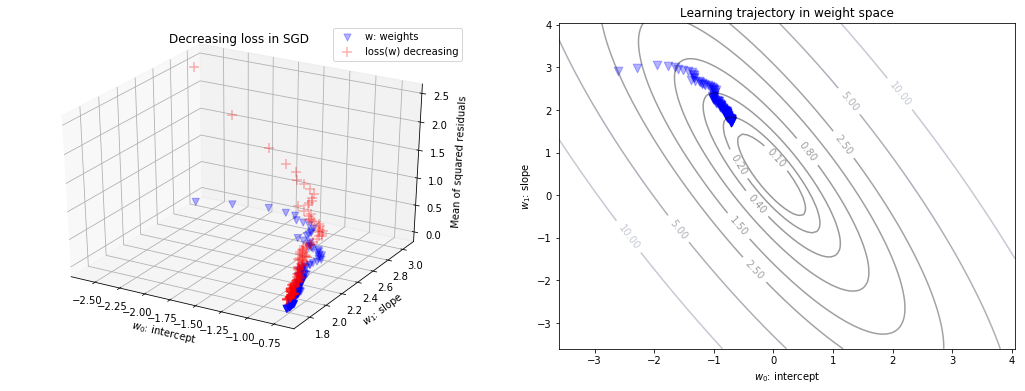

In [25]:
w0=(-2.5,2.5)+np.random.randn(2)
print(w0.shape)
wts, whist, rsshist = sgdescent(Alin, y0,  w0, 2, 100, 150)
wmin, wmax = (np.min(whist),np.max(whist))

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(18,6))
ax0 = fig.add_subplot(121, projection='3d')

x = whist[:,0]
y = whist[:,1]
z = rsshist
zeros = np.zeros(len(z))
ax0.scatter(x,y,zeros,marker="v",alpha=0.3, label='w: weights',  c= 'b', s=50)
ax0.scatter(x, y, z, label='loss(w) decreasing', marker='+', alpha=0.3,  c= 'r', s=100)


ax0.legend()
ax0.set_xlabel("$w_0$: intercept")
ax0.set_ylabel("$w_1$: slope")
ax0.set_zlabel("Mean of squared residuals")
ax0.set_title("Decreasing loss in SGD")

# earlier, for the SGD training, npts = 8

np.random.seed(0)
X=np.linspace(0,1,npts)
Alin=np.stack((np.ones(npts),X)).T
y0=f(X)+0.03*np.random.normal(0,1,npts)

ax1 = fig.add_subplot(122)

w0pts=np.linspace(wmin-1,wmax+1,100)
w1pts=np.linspace(wmin-1,wmax+1,100)
w0n, w1n = np.meshgrid(w0pts, w1pts, indexing='ij')
sqloss = np.zeros((w0pts.size,w1pts.size))

# Mean of squares of residuals (loss) based on grid of (w0, w1) values
for (i,j),v in np.ndenumerate(sqloss):
#    rss[i,j] =((y0 - (w0n[i,j]+X.ravel()*w1n[i,j]))**2).sum()
    wij = np.asarray([w0n[i,j],w1n[i,j]])
    sqloss[i,j] = np.square(y0 - Alin.dot(wij)).mean()    

contplot = ax1.contour(w0n, w1n, sqloss,levels=[0.1,.2,.4,0.8,1.5, 2.5, 5, 10,20],  alpha=.4,cmap=plt.cm.bone) 
ax1.clabel(contplot, inline=True, fontsize=10, fmt='%.2f')


#ax1.contour(w0n, w1n, rss, cmap=plt.cm.copper, levels=[1, 2, 5, 10, 20])
ax1.scatter(x,y,marker='v',   c= 'b',alpha=0.3, s=75)
ax1.set_xlabel("$w_0$: intercept")
ax1.set_ylabel("$w_1$: slope")
ax1.set_title("Learning trajectory in weight space")


plt.show()

## Regularisation -- add L1 or L2 norm to the loss function

In [5]:
# 
def reg_gradientdescent(w, X, y, l1, l2, core=1, rate = 0.1, n_iterations = 50):
    wtseq = [w] #w是向量
    for iteration in range(n_iterations):
        gradients =  core*2/len(X) * X.T.dot(X.dot(w) - y) + \
                    l1 * np.sign(w) + 2 * l2 * w

        w = w - rate * gradients
        wtseq.append(w)
        
    return np.array(wtseq)

In [20]:
# This is taken from Aurelion Gueron's "Hands-on Machine Learning with Scikit-Learn and TensorFlow"

t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

# ignoring bias term
t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
print("t1",t1.shape) #500*500
print("t2",t2.shape) #500*500

T = np.c_[t1.ravel(), t2.ravel()]  #ravel将多维数组扁平化转化成一维数组，c_是将两个一维数组按列组成一个二维数组
print(T.shape)  #500*500=250000行2列

Xr = np.array([[-1, 1], [-0.3, -1], [1, 0.1]])  # input Xr是系数矩阵 3*2
print(Xr)
print(Xr[:,:1]) #Xr的第一列
print(Xr[:, 1:]) #Xr的第一列
yr = 2.5 * Xr[:, :1] + 0.5 * Xr[:, 1:] # outputs, with best-fit weights (w_1, w_2) = (2.5, 0.5) 
print(yr.shape) #3*1

# mean sum of squares of the residuals; the contours of this will be drawn as ellipses below
J = (1/len(Xr) * np.sum((T.dot(Xr.T) - yr.T)**2, axis=1)).reshape(t1.shape) 
# print(Xr.T.shape)
print(len(Xr)) #3
print(T.dot(Xr.T).shape) #25000*3
print((T.dot(Xr.T) - yr.T).shape) #250000*3


# these are the norms to be added as regularisation terms to the loss J
N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx] # unregularised minimum of loss (2.5, 0.5)

wt_init = np.array([[-0.5], [-1]]) # initial weights  2*1
# print(wt_init.shape)

t1 (500, 500)
t2 (500, 500)
(250000, 2)
[[-1.   1. ]
 [-0.3 -1. ]
 [ 1.   0.1]]
[[-1. ]
 [-0.3]
 [ 1. ]]
[[ 1. ]
 [-1. ]
 [ 0.1]]
(3, 1)
3
(250000, 3)
(250000, 3)


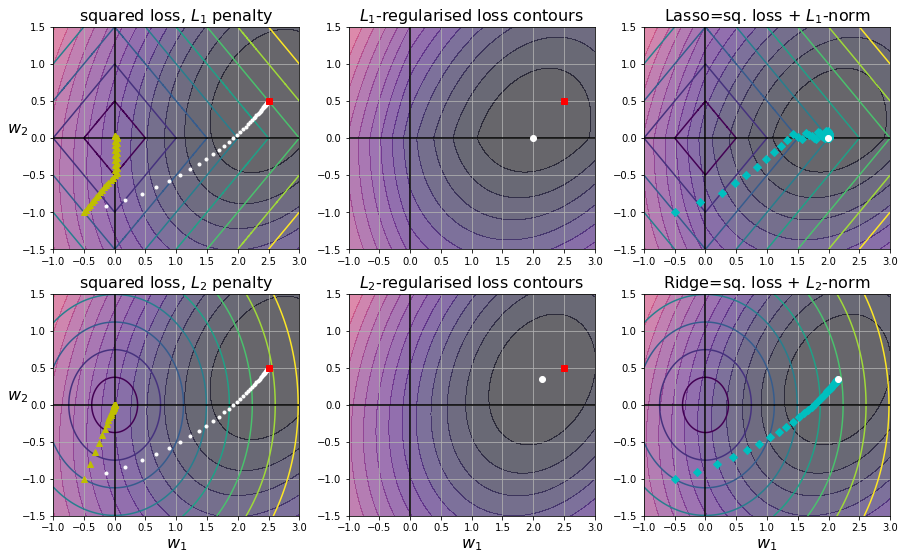

In [7]:
fig, ax = plt.subplots(nrows=2, ncols=3,figsize=(15,9))

for i, N, l1, l2, title in ((0, N1, 0.5, 0, "Lasso=sq. loss + $L_1$-norm"),\
                            (1, N2, 0,  0.1, "Ridge=sq. loss + $L_2$-norm")):
    JR = J + l1 * N1 + l2 * N2**2  
    # note that if l1 = 0.5, l2 = 0 making JR = J + 0.5*N1 loss plus L1 regulariser (Lasso)
    # and if l2 = 0.1, l1 = 0 making JR = J + 0.1*N2 loss plus L2 regulariser (Ridge regression)
    
    wt_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[wt_min_idx], t2[wt_min_idx]

    levelsJ=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(J) - np.min(J)) + np.min(J)
    levelsJR=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) - np.min(JR)) + np.min(JR)
    levelsN=np.linspace(0, np.max(N), 10)
    
    path_J = reg_gradientdescent(wt_init, Xr, yr, l1=0, l2=0)  
    path_JR = reg_gradientdescent(wt_init, Xr, yr, l1, l2)
    path_N = reg_gradientdescent(wt_init, Xr, yr, np.sign(l1)/3, np.sign(l2), core=0)

    
    
    ax[i,0].grid(True)
    ax[i,0].axhline(y=0, color='k')
    ax[i,0].axvline(x=0, color='k')
    ax[i,0].contourf(t1, t2, J, levels=levelsJ, alpha=0.6,cmap=plt.cm.magma)
    ax[i,0].contour(t1, t2, N, levels=levelsN)
    ax[i,0].plot(path_J[:, 0], path_J[:, 1], "w.")
    ax[i,0].plot(path_N[:, 0], path_N[:, 1], "y^")
    ax[i,0].plot(t1_min, t2_min, "rs") # minimum of unregularised loss shown as a red square
    ax[i,0].set_title(r"squared loss, $L_{}$ penalty".format(i + 1), fontsize=16)
    ax[i,0].axis([t1a, t1b, t2a, t2b])


    ax[i,1].grid(True)
    ax[i,1].axhline(y=0, color='k')
    ax[i,1].axvline(x=0, color='k')
    ax[i,1].contourf(t1, t2, JR, levels=levelsJR, alpha=0.6,cmap=plt.cm.magma)
    ax[i,1].plot(t1_min, t2_min, "rs")  # minimum of unregularised loss as red square
    ax[i,1].plot(t1r_min, t2r_min, "wo") # minimum of regularised loss as white circle
    ax[i,1].set_title(r"$L_{}$-regularised loss contours".format(i+1), fontsize=16)
    ax[i,1].axis([t1a, t1b, t2a, t2b])

    
    ax[i,2].grid(True)
    ax[i,2].axhline(y=0, color='k')
    ax[i,2].axvline(x=0, color='k')
    ax[i,2].contourf(t1, t2, JR, levels=levelsJR, alpha=0.6,cmap=plt.cm.magma)
    ax[i,2].contour(t1, t2, N, levels=levelsN)
    ax[i,2].plot(path_JR[:, 0], path_JR[:, 1], "cD")
    ax[i,2].plot(t1r_min, t2r_min, "wo")
    ax[i,2].set_title(title, fontsize=16)
    ax[i,2].axis([t1a, t1b, t2a, t2b])
    
for i in range(2):
    ax[i,0].set_ylabel(r"$w_2$", fontsize=16, rotation=0)
ax[1,0].set_xlabel(r"$w_1$", fontsize=16)
ax[1,1].set_xlabel(r"$w_1$", fontsize=16)
ax[1,2].set_xlabel(r"$w_1$", fontsize=16)



plt.show()